In [10]:
import numpy as np                # to load numpy library
import pandas as pd               # to load panda library
import matplotlib.pyplot as plt   # to load the matplotlib library only pyplot to ploy the graphs
%matplotlib inline                
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
Location = r'data/india-districts-census-2011.csv'  # location where the data is stored
df = pd.read_csv(Location)                          # reading the file from the location and storing it in the dataframes

In [12]:
#list(df)

In [13]:
dfc2 = df[["State name","District name","Workers"]]

In [14]:
dfc2_b = dfc2[(dfc2['State name'] == 'BIHAR')]   # to only select the data where state name is BIHAR

In [15]:
dfc2_t = dfc2[(dfc2['State name'] == 'TAMIL NADU')]   # to only select the data where state name is TAMIL NADU

In [16]:
dev = 0.008
bdict = {}                                                    # to store the bihar districts
tdict = {}                                                    # to store the tamil nadu districts
for ti,ts,td,tw in dfc2_t.itertuples():
    x1 = tw-dev*tw
    x2 = tw+dev*tw
    for bi,bs,bd,bw in dfc2_b.itertuples():
        y1 = bw-dev*bw
        y2 = bw+dev*bw
        if ((x1<=bw) and (bw<=x2))or((y1<=tw) and (tw<=y2)):
          #  print td + " are similar " + bd                  # these are only to check which district is similar to which one in text form
          #  print "%d worker %d"%(tw,bw)                     # can be use for debugging the code   
            bdict[bd] = bw
            tdict[td] = tw

In [17]:
from collections import OrderedDict
from operator import itemgetter
db = OrderedDict(sorted(bdict.items(), key=itemgetter(1)))
dt = OrderedDict(sorted(tdict.items(), key=itemgetter(1)))

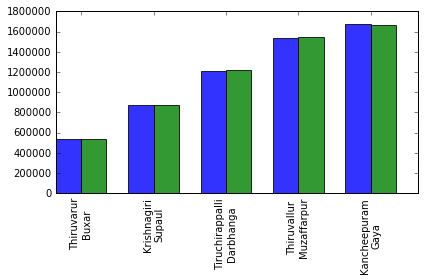

In [18]:
n_groups = len(db)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, dt.values(), bar_width,
                alpha=opacity,
                color='b',
                label='TN')

rects2 = plt.bar(index + bar_width, db.values(), bar_width,
                alpha=opacity,
                color='g',
                label='BH')
plt.xticks(rotation=90)
lab = []
for (k,v), (k2,v2) in zip(dt.items(), db.items()):
    lab.append(k +"\n"+ k2)
plt.xticks(index + bar_width , lab)
plt.tight_layout()
plt.show()